# Decision Tree Classification

In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor ,plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt

balance_data = pd.read_csv(r'C:\Users\jayavaradhan.olivu\OneDrive - DISYS\Documents\Data Science\Data Science - Python\Python Practice\Machine Learning\Decision_Tree_ Dataset.csv', 
                sep=',', header=0)

In [10]:
print('Dataset Lenght: ', len(balance_data))
print('Dataset Shape: ', balance_data.shape)

Dataset Lenght:  1000
Dataset Shape:  (1000, 6)


Accuracy Scores
Test:  92.66666666666666
Train:  89.71428571428571


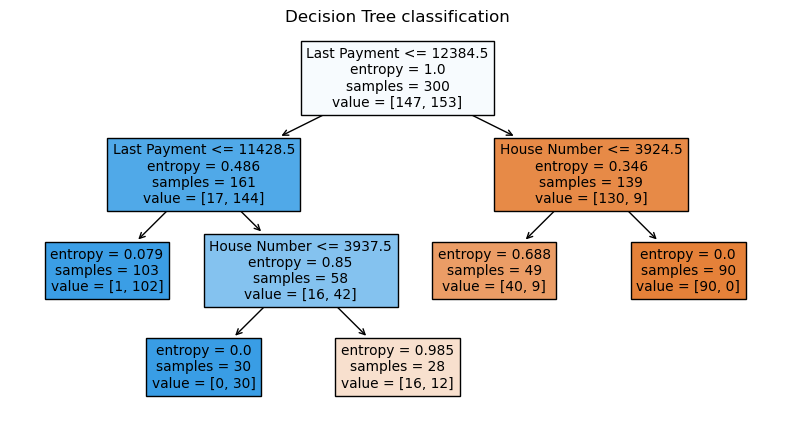

In [54]:
x = balance_data.values[:, 0:4]
y = balance_data.values[:, 5:6]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size= 0.3)

clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3,max_leaf_nodes=5,random_state=100)

clf_entropy.fit(x_train, y_train)
clf_entropy.fit(x_test, y_test)

y_prediction_test = clf_entropy.predict(x_test)
y_prediction_train = clf_entropy.predict(x_train)

accuracy_score_test = accuracy_score(y_test, y_prediction_test)
accuracy_score_train = accuracy_score(y_train, y_prediction_train)

print('Accuracy Scores')
print('Test: ', accuracy_score_test * 100)
print('Train: ', accuracy_score_train * 100)

plt.figure(figsize=(10, 5))
plot_tree(clf_entropy, feature_names=balance_data.columns[0:4], filled=True)
plt.title('Decision Tree classification')
plt.show()

# Building a user-friendly interface to predict whether the patient's heart is fine or has some disease

In [43]:
Featues_Name = balance_data.columns[0:4]

Initial_Payment = input('Initial Payment: ')
Last_Payment = input('Last Payment: ')
Credit_Score = input('Credit Score: ')
House_Number = input('House Number: ')

new_balance = pd.DataFrame([[Initial_Payment, Last_Payment, Credit_Score, House_Number]], columns=Featues_Name)

predicte = clf_entropy.predict(new_balance)

if (predicte == 'yes'):
    print('Yes, the customer is eligilbe for loan')
else:
    print('No, the customer is not eligilbe for loan')

Initial Payment:  200
Last Payment:  5000
Credit Score:  300
House Number:  4001


Yes, the customer is eligilbe for loan


C:\Users\jayavaradhan.olivu\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# Decision Tress Regressor

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
day_df = pd.read_csv(r'C:\Users\jayavaradhan.olivu\OneDrive - DISYS\Documents\Data Science\Data Science - Python\Python Practice\Machine Learning\bike_sharing_daily.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df.info()
day_df.isna().sum()
day_df.describe()

Text(0.5, 1.0, 'Histrogram of count')

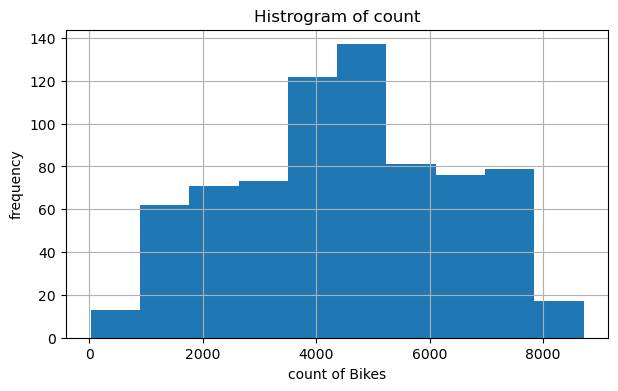

In [96]:
plt.figure(figsize=(7, 4))
plt.hist(day_df['cnt'])
plt.grid()
plt.xlabel('count of Bikes')
plt.ylabel('frequency')
plt.title('Histrogram of count')

In [142]:
# day_df.drop(['dteday'], axis=1, inplace=True)
x = day_df.iloc[:, :-1]
y = day_df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=99)

reg_model = DecisionTreeRegressor(criterion='squared_error', max_depth=10, min_samples_split=10, random_state=5)
reg_model.fit(x_train, y_train)

y_pred = reg_model.predict(x_test)

In [150]:
## since this is continuous data we should use the mse and r2 metries

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: ', round(mse, 2))
print('R2: ', round(r2, 2))

Mean Squared Error:  62421.65
R2:  0.98


# using the 'bins'
    Just using this method to binning the continuous values into descrete values

In [187]:
print('min: ', y.min())
print('max: ', y.max())

min_value = y.min()
max_value = y.max()

bins = np.linspace(min_value, max_value, num=5)
labels = ['A', 'B', 'C', 'D']
final = pd.cut(y, bins=bins, labels=labels)
print('Bins:', bins)
final.loc[final=='C']


min:  22
max:  8714
Bins: [  22. 2195. 4368. 6541. 8714.]


115    C
118    C
119    C
121    C
122    C
      ..
713    C
714    C
716    C
717    C
718    C
Name: cnt, Length: 252, dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']